In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime

# Define the tickers and date range
ticker_2y = "DGS2"
ticker_10y = "DGS10"
sp500_ticker = "^GSPC"  # S&P 500 Index ticker
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch Treasury yield data
data_2y = pdr.DataReader(ticker_2y, 'fred', start, end)
data_10y = pdr.DataReader(ticker_10y, 'fred', start, end)

# Fetch S&P 500 Index data
sp500_data = pdr.DataReader(sp500_ticker, 'yahoo', start, end)

# Resample Treasury yield data to monthly frequency
data_2y_monthly = data_2y.resample('M').last()
data_10y_monthly = data_10y.resample('M').last()

# Calculate the yield spread and resample
combined_data = pd.DataFrame({'2Y': data_2y_monthly['DGS2'], '10Y': data_10y_monthly['DGS10']})
combined_data['Spread'] = combined_data['10Y'] - combined_data['2Y']

# Resample S&P 500 data to monthly frequency
sp500_data_monthly = sp500_data['Close'].resample('M').last()

# Align the indices of both datasets
combined_data.index = combined_data.index.to_period('M')
sp500_data_monthly.index = sp500_data_monthly.index.to_period('M')

# Merge with S&P 500 Index
combined_data_sp500 = combined_data.join(sp500_data_monthly, how='inner')

# Convert Period index to datetime for plotting
combined_data_sp500.index = combined_data_sp500.index.to_timestamp()

# Normalize the data
combined_data_sp500['Normalized_SP500'] = (combined_data_sp500['Close'] / combined_data_sp500['Close'].iloc[0]) * 100
combined_data_sp500['Normalized_Spread'] = (combined_data_sp500['Spread'] / combined_data_sp500['Spread'].iloc[0]) * 100

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(combined_data_sp500.index, combined_data_sp500['Normalized_SP500'], label='S&P 500 Index (Normalized)')
plt.plot(combined_data_sp500.index, combined_data_sp500['Normalized_Spread'], label='Yield Spread (Normalized)')
plt.title('S&P 500 Index vs. Yield Curve Spread')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()


TypeError: string indices must be integers, not 'str'

[*********************100%%**********************]  1 of 1 completed


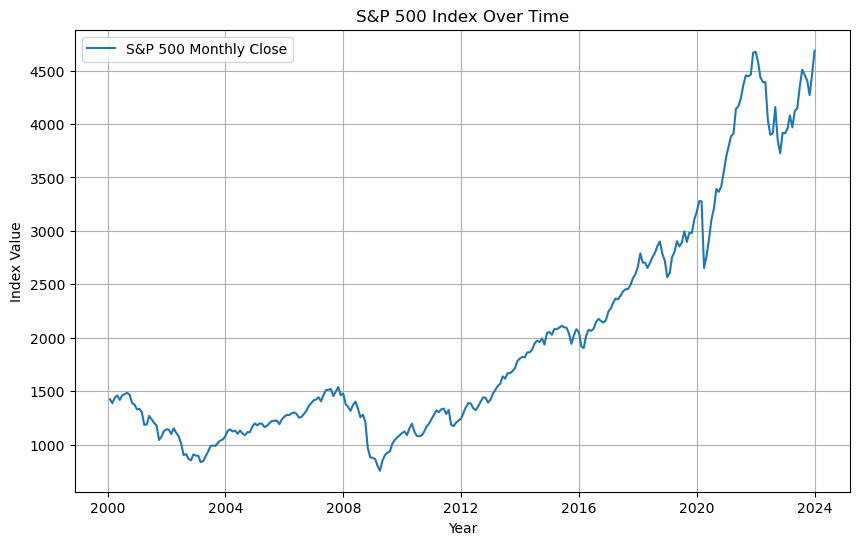

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# Define the ticker symbol for the S&P 500 Index
sp500_ticker = "^GSPC"

# Define the date range
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch the data
sp500_data = yf.download(sp500_ticker, start=start, end=end)

# Resample to get monthly data
sp500_monthly = sp500_data['Close'].resample('M').mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sp500_monthly, label='S&P 500 Monthly Close')
plt.title('S&P 500 Index Over Time')
plt.ylabel('Index Value')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()



[*********************100%%**********************]  1 of 1 completed


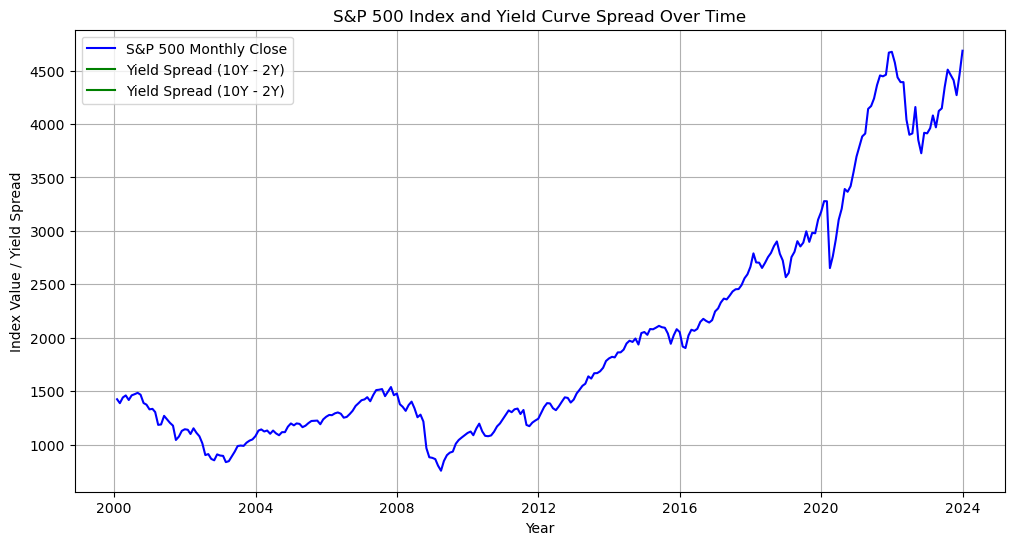

In [5]:
import yfinance as yf
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import datetime

# Define the tickers for 2-year and 10-year Treasury bond yields
ticker_2y = "DGS2"  # FRED code for 2-year Treasury bond yield
ticker_10y = "DGS10"  # FRED code for 10-year Treasury bond yield

# Define the ticker symbol for the S&P 500 Index
sp500_ticker = "^GSPC"

# Define the date range
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch Treasury bond yields from FRED
data_2y = pdr.DataReader(ticker_2y, 'fred', start, end)
data_10y = pdr.DataReader(ticker_10y, 'fred', start, end)

# Fetch S&P 500 data from Yahoo Finance
sp500_data = yf.download(sp500_ticker, start=start, end=end)

# Resample to monthly data
data_2y_monthly = data_2y.resample('M').last()
data_10y_monthly = data_10y.resample('M').last()
sp500_monthly = sp500_data['Close'].resample('M').mean()

# Calculate the yield spread
yield_spread = data_10y_monthly - data_2y_monthly

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sp500_monthly.index, sp500_monthly, label='S&P 500 Monthly Close', color='blue')
plt.plot(yield_spread.index, yield_spread, label='Yield Spread (10Y - 2Y)', color='green')
plt.title('S&P 500 Index and Yield Curve Spread Over Time')
plt.ylabel('Index Value / Yield Spread')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


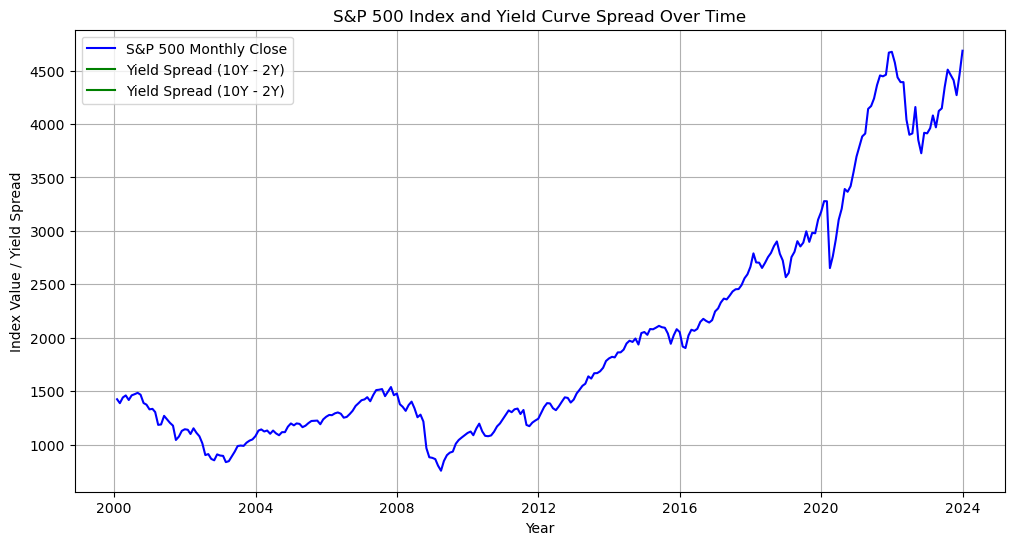

In [6]:
import yfinance as yf
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import datetime

# Define the tickers for 2-year and 10-year Treasury bond yields
ticker_2y = "DGS2"  # FRED code for 2-year Treasury bond yield
ticker_10y = "DGS10"  # FRED code for 10-year Treasury bond yield

# Define the ticker symbol for the S&P 500 Index
sp500_ticker = "^GSPC"

# Define the date range
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch Treasury bond yields from FRED
data_2y = pdr.DataReader(ticker_2y, 'fred', start, end)
data_10y = pdr.DataReader(ticker_10y, 'fred', start, end)

# Fetch S&P 500 data from Yahoo Finance
sp500_data = yf.download(sp500_ticker, start=start, end=end)

# Resample to monthly data
data_2y_monthly = data_2y.resample('M').last()
data_10y_monthly = data_10y.resample('M').last()
sp500_monthly = sp500_data['Close'].resample('M').mean()

# Calculate the yield spread and ensure it aligns with the same index as S&P 500 monthly data
yield_spread = (data_10y_monthly - data_2y_monthly).reindex(sp500_monthly.index)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sp500_monthly.index, sp500_monthly, label='S&P 500 Monthly Close', color='blue')
plt.plot(yield_spread.index, yield_spread, label='Yield Spread (10Y - 2Y)', color='green')
plt.title('S&P 500 Index and Yield Curve Spread Over Time')
plt.ylabel('Index Value / Yield Spread')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


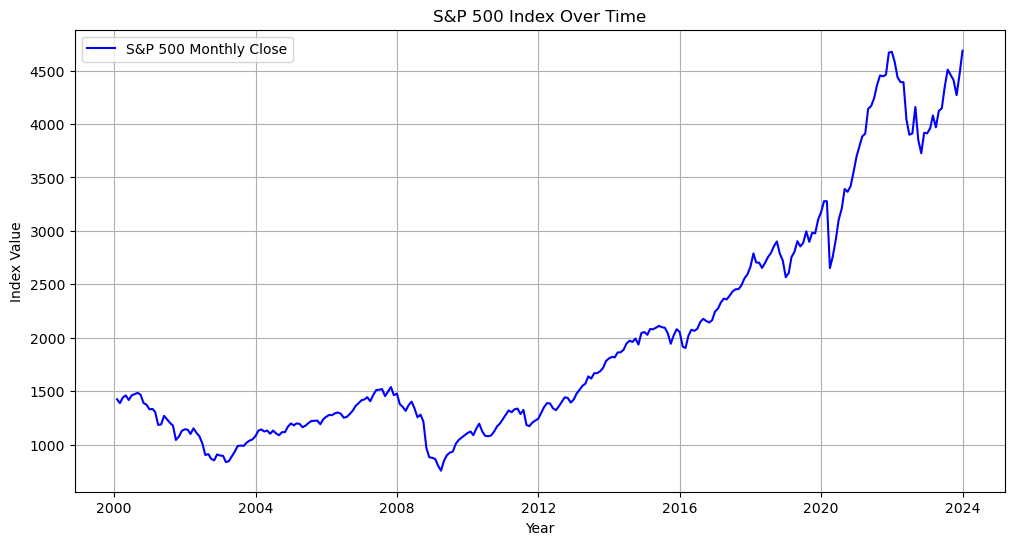

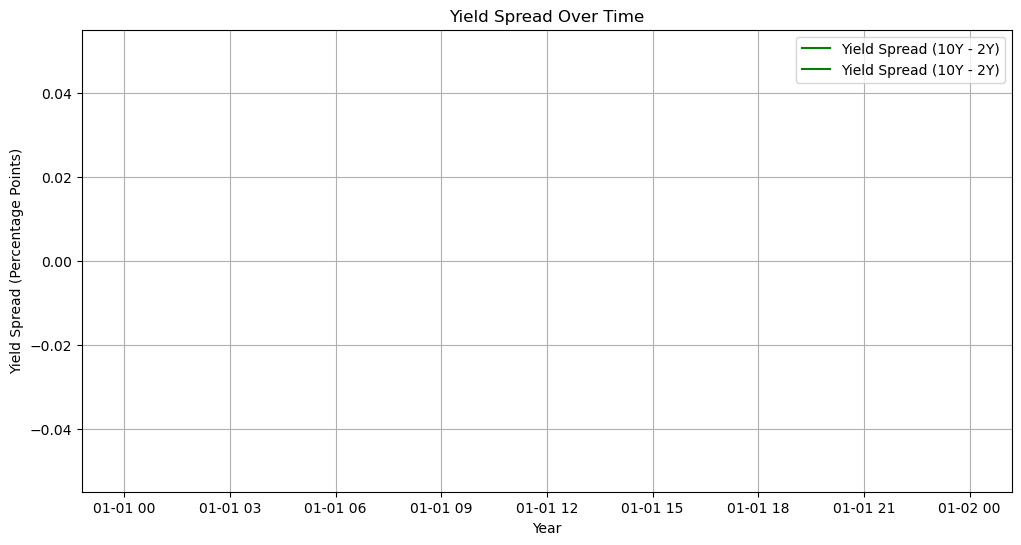

In [7]:
import yfinance as yf
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import datetime

# Define the tickers and date range
ticker_2y, ticker_10y, sp500_ticker = "DGS2", "DGS10", "^GSPC"
start, end = datetime.datetime(2000, 1, 1), datetime.datetime(2024, 1, 1)

# Fetch data
data_2y = pdr.DataReader(ticker_2y, 'fred', start, end)
data_10y = pdr.DataReader(ticker_10y, 'fred', start, end)
sp500_data = yf.download(sp500_ticker, start=start, end=end)

# Resample to monthly data
data_2y_m = data_2y.resample('M').last()
data_10y_m = data_10y.resample('M').last()
sp500_m = sp500_data['Close'].resample('M').mean()

# Calculate yield spread
yield_spread = (data_10y_m - data_2y_m).dropna()
yield_spread = yield_spread.reindex(sp500_m.index, method='ffill')  # Forward fill to handle missing dates

# Plot S&P 500
plt.figure(figsize=(12, 6))
plt.plot(sp500_m, label='S&P 500 Monthly Close', color='blue')
plt.title('S&P 500 Index Over Time')
plt.ylabel('Index Value')
plt.xlabel('Year')
plt.legend()
plt.grid(True)

# Plot Yield Spread
plt.figure(figsize=(12, 6))
plt.plot(yield_spread, label='Yield Spread (10Y - 2Y)', color='green')
plt.title('Yield Spread Over Time')
plt.ylabel('Yield Spread (Percentage Points)')
plt.xlabel('Year')
plt.legend()
plt.grid(True)

plt.show()
